In [1]:
# import the required libraries and surpess warnings

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from IPython.display import display

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# read the dataset
concrete_df = pd.read_csv('concrete.csv')

In [3]:
# look at the head
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
# check the shape
concrete_df.shape

(1030, 9)

#### Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)

In [5]:
display(concrete_df.info())
display(concrete_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### from the descibe method we can see the range of values observed, central values (mean and median), standard deviation and quartiles.

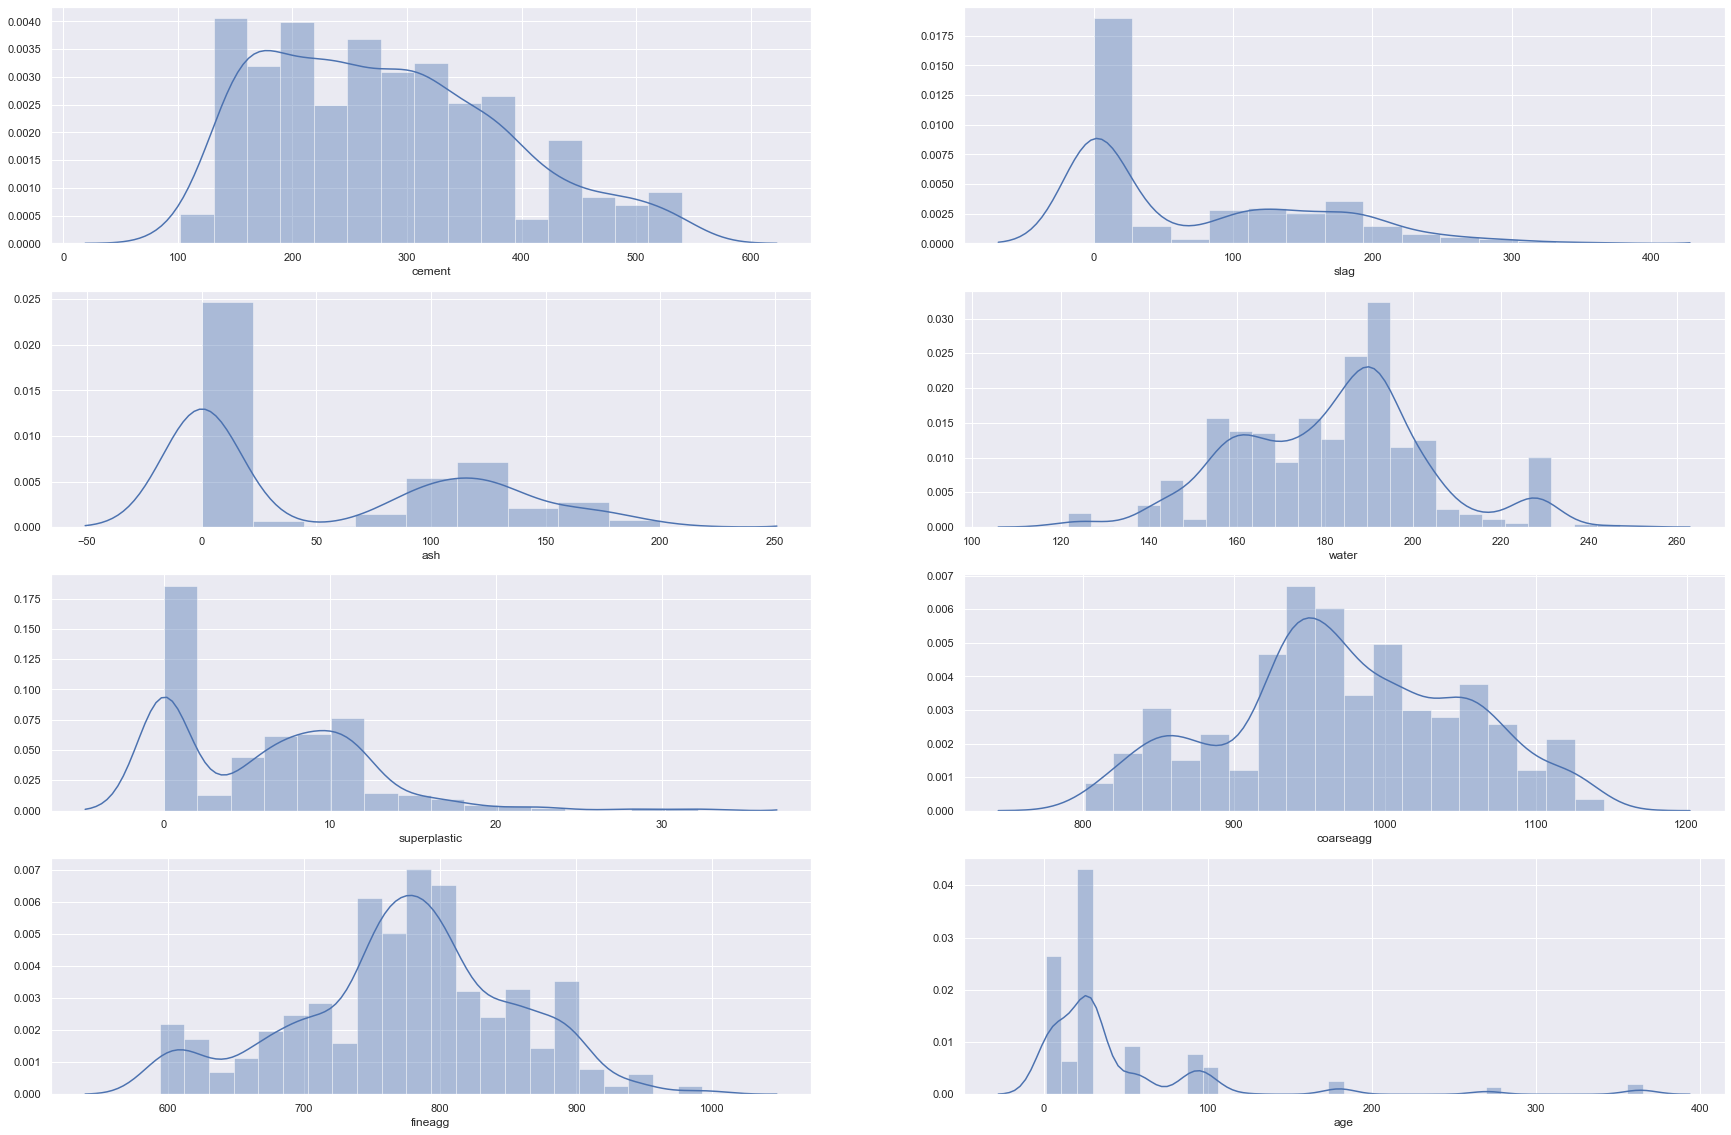

In [6]:
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback =  list(concrete_df.columns)[:-1]

for i in feedback:
    plt.subplot(4, 2, pos)
    sns.distplot(concrete_df[i])
    pos += 1  # to plot over the grid one by one  

### From the above distribution plot we can that cement, slag, age are Right Skewd
### None of the data is following normal distribution
### Some models seems to be bimodal

#### Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)

In [7]:
display(concrete_df.isna().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### we can see that there are no missing values not considering hidden missing values like zero can be null

In [8]:
display(concrete_df.shape)
concrete_df = concrete_df.drop_duplicates()
display(concrete_df.shape)

(1030, 9)

(1005, 9)

### we can see there are 25 duplicate values, which is now being dropped

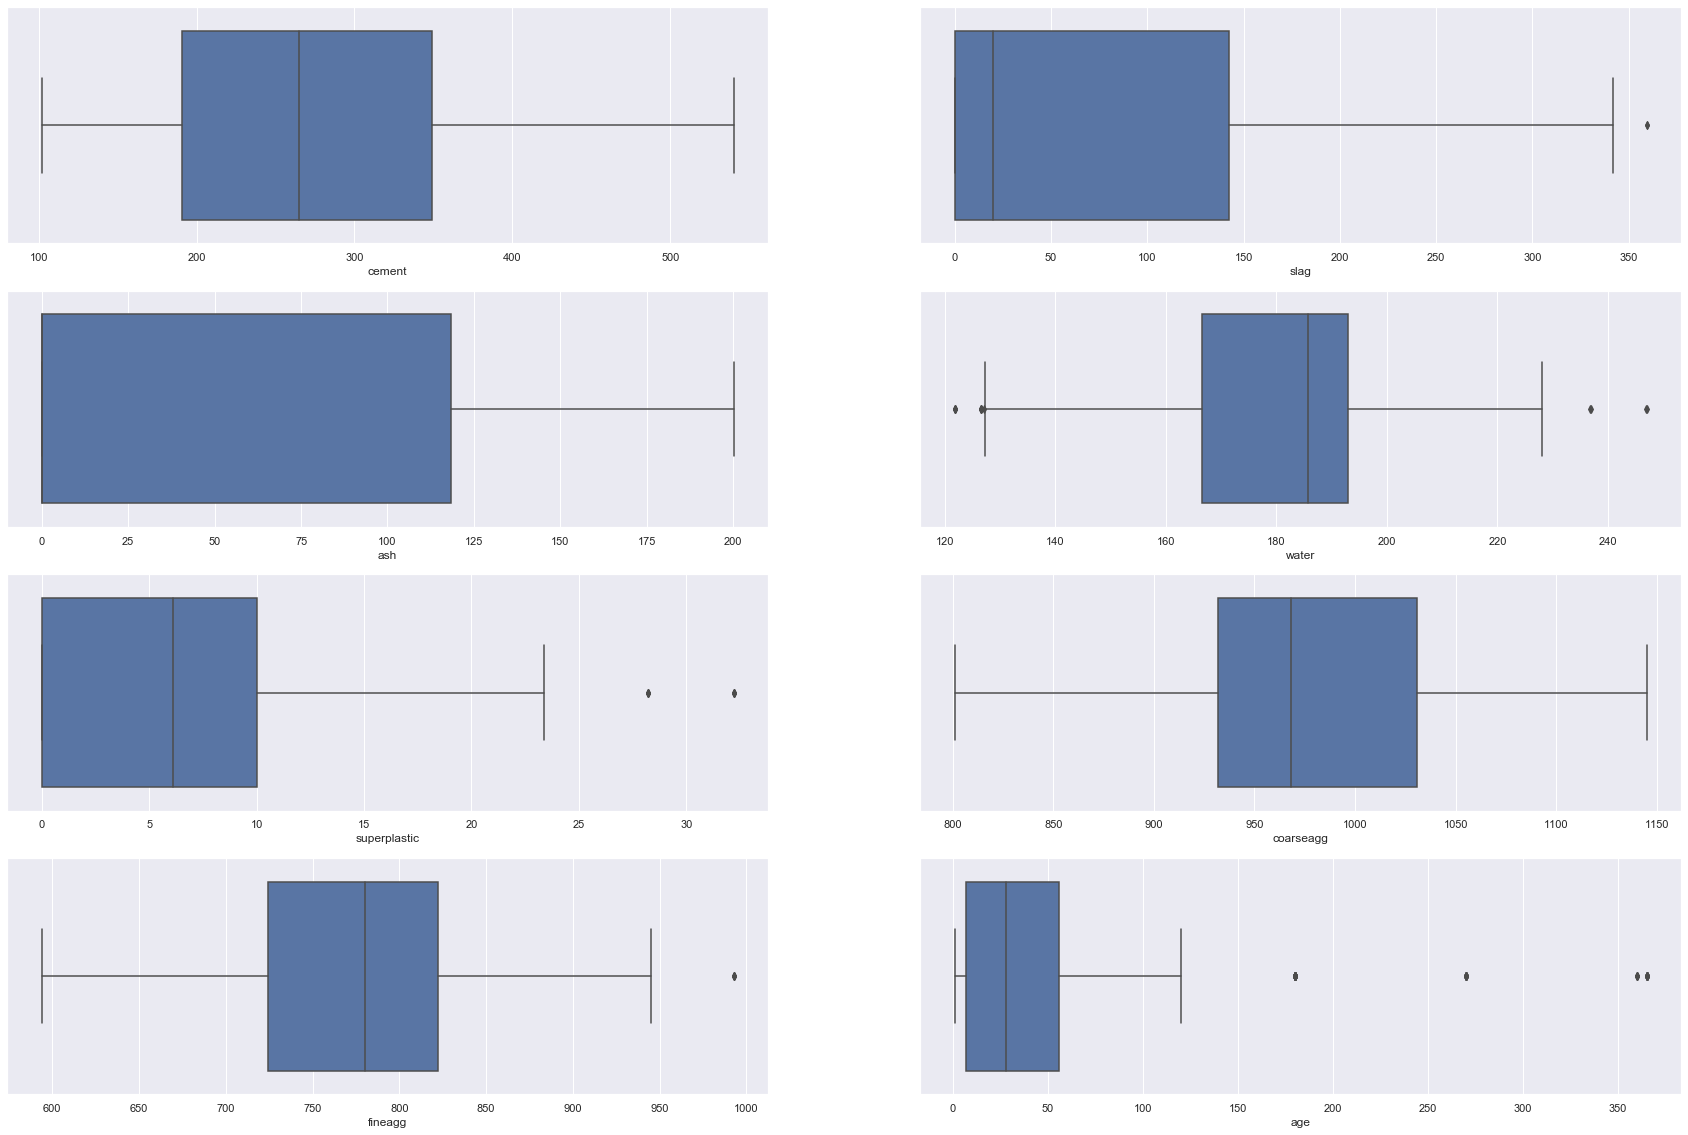

In [9]:
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback =  list(concrete_df.columns)[:-1]

for i in feedback:
    plt.subplot(4, 2, pos)
    sns.boxplot(concrete_df[i])
    pos += 1  # to plot over the grid one by one 

### from the above box plots we can see slag, water, superplastic, fineagg and age has outliers

In [10]:
# slag , ash and superplastic has min value 0 so can be potentially missing

# check the percentage of 0 in these columns

data_size = concrete_df.shape[0]
for i in ['slag','ash','superplastic']:
    t = concrete_df[concrete_df[i] == 0].shape[0]
    print(f'Percentage of 0 in {i} is {(t/data_size)*100}')

Percentage of 0 in slag is 46.766169154228855
Percentage of 0 in ash is 53.830845771144276
Percentage of 0 in superplastic is 37.61194029850746


### Only slag, ash and superplastic has zero values. But thses are not null values. I say this based on two things. First based on some domain reseach I came to conclusion that 0 values are possible. Second based on analytics on data. We see around 47 %, 54 % and 37 % vaues 0. So I believe this huge percentaages of data cannot be null.

#### Using various plots, write the insights/observations about it. (6 Marks)

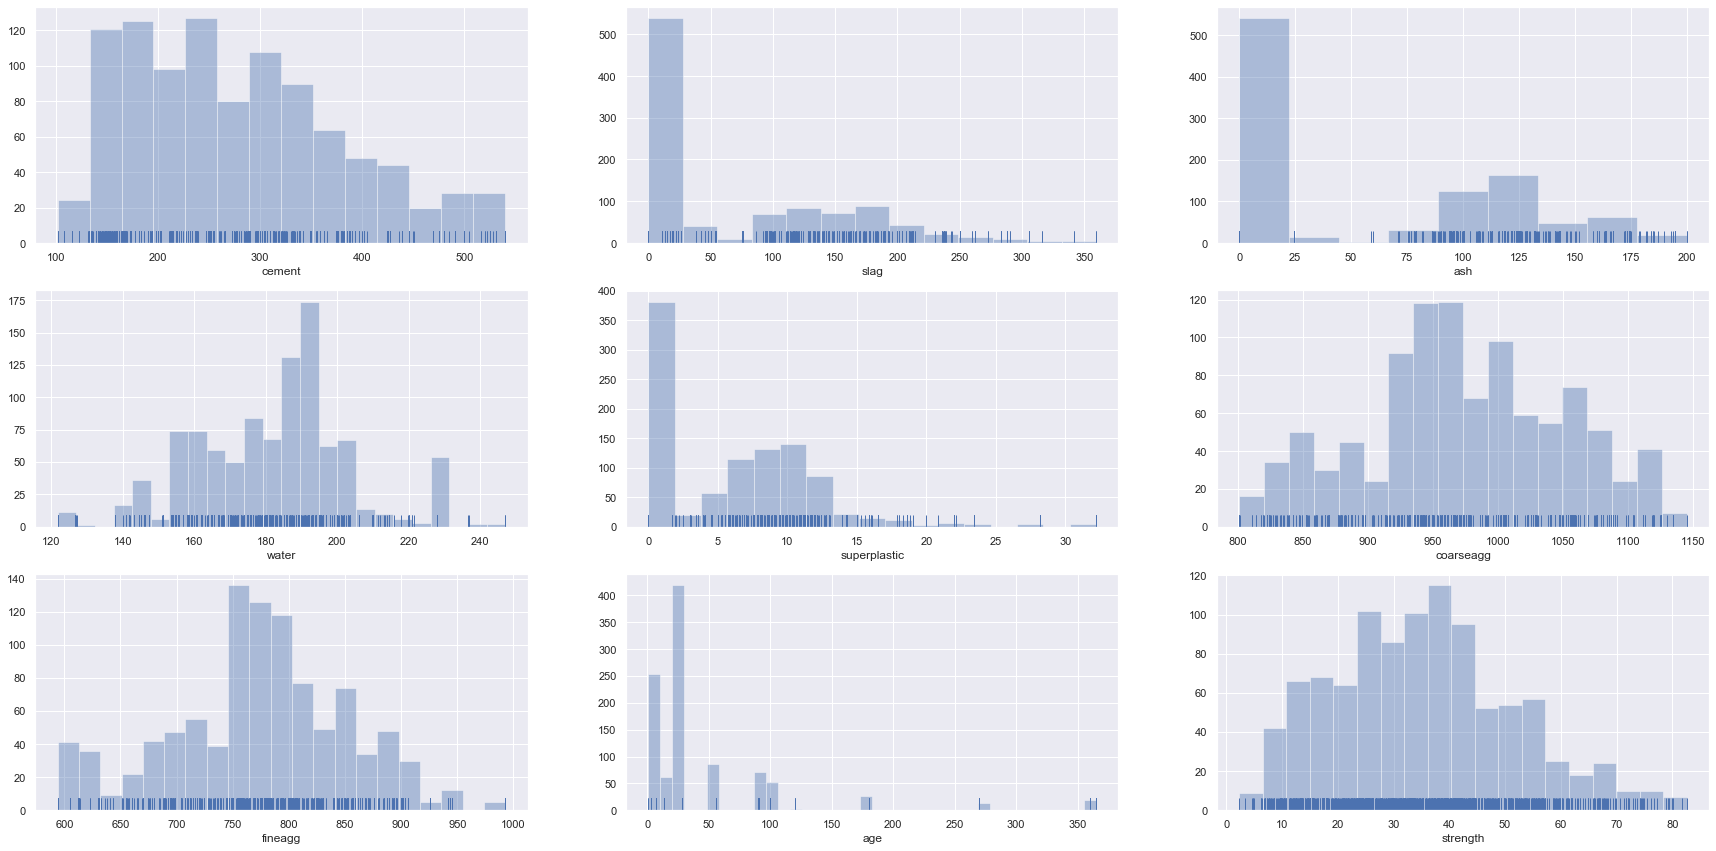

In [11]:
## Using Distplot withiout KDE and with rugs
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback =  list(concrete_df.columns) 

for i in feedback:
    plt.subplot(4, 3, pos)
    sns.distplot(concrete_df[i],kde=False, rug=True)
    pos += 1  # to plot over the grid one by one 

### From the above Histogram and kde plots above:

#### only courseagg, fineagg , strength and water are somewhat close to gaussian distribution
####  stag, ash , age are higly skewed

#### in general looks like the amount of stag, ash and superplastic used is on the lower end
#### most of the concrete data is taken at an early stage looking at the age



### Blox plots used in one of the above questions explaines about the outliers in the data

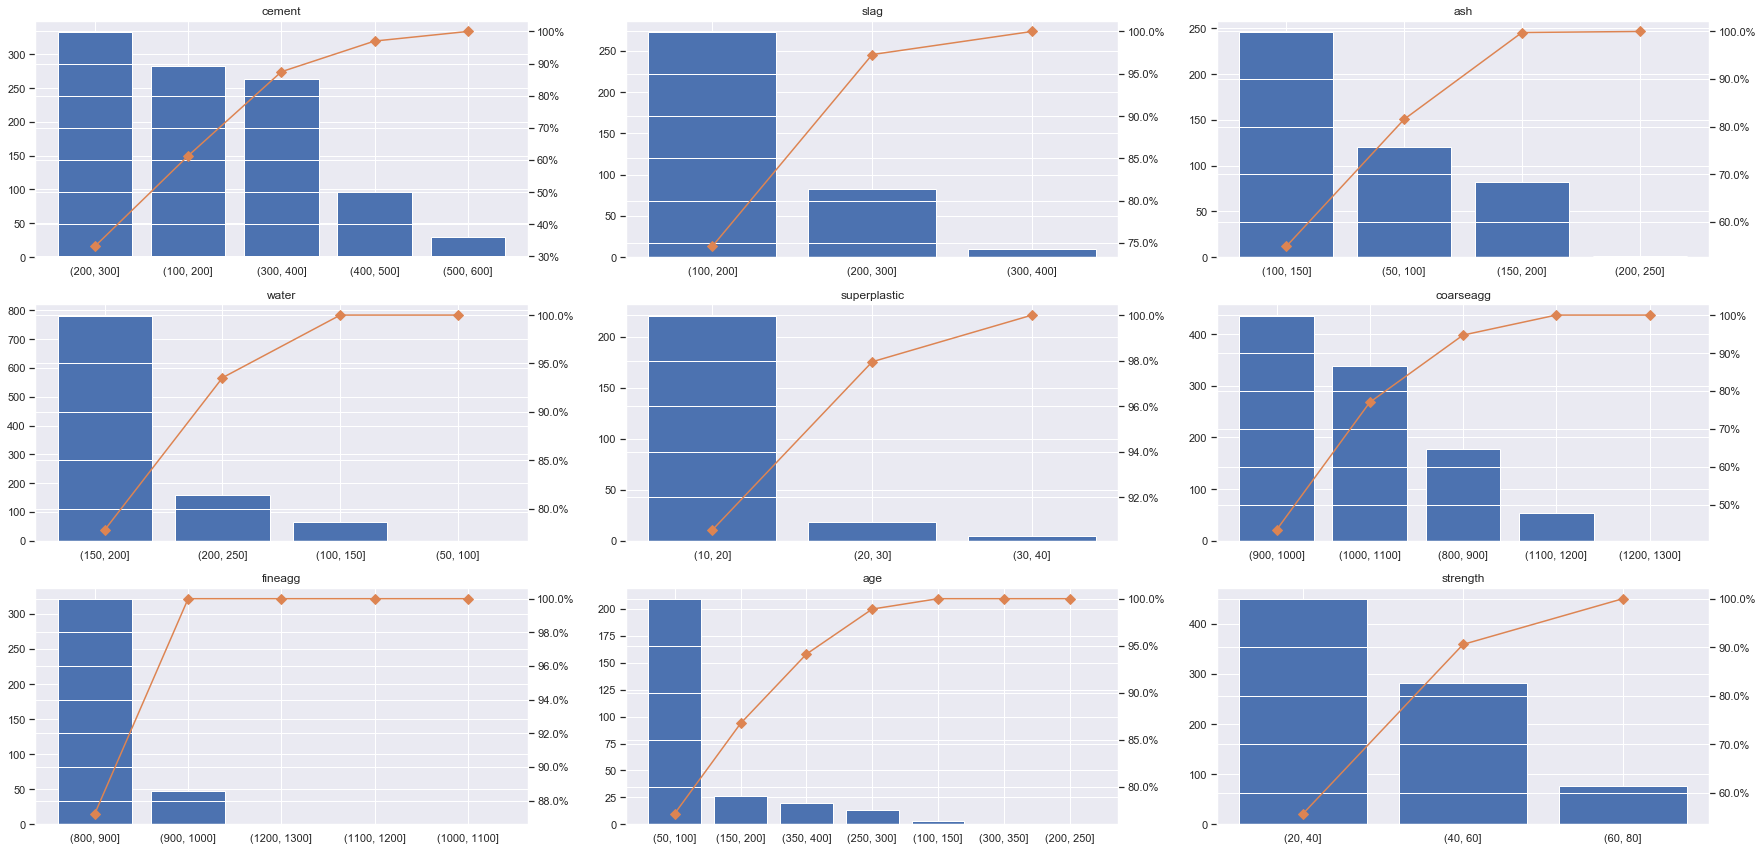

In [12]:
## building a pareto plot

temp = concrete_df.copy()
## Using Distplot withiout KDE and with rugs
plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback =  list(concrete_df.columns) 
feedback_bins = {
    'cement' : [100,200,300,400,500,600],
    'slag' : [100,200,300,400],
    'ash' : [50,100,150,200,250],
    'water' : [50,100,150,200,250],
    'superplastic' : [10,20,30,40],
    'coarseagg' : [800,900,1000,1100,1200,1300],
    'fineagg' : [800,900,1000,1100,1200,1300],
    'age' : [50,100,150,200,250,300,350,400],
    'strength' :[20,40,60,80]
    
}

for i in feedback:
    tempX = temp[i].sort_values(ascending = False).reset_index(drop=True)
    tempX = pd.cut(tempX, bins=feedback_bins[i])
    tempX = pd.DataFrame(tempX.value_counts() )
    tempX = tempX.reset_index()
    tempX.columns = ['val',i]
    tempX['val'] =  tempX['val'].astype(str)
    tempX["cumpercentage"] = tempX[i].cumsum()/tempX[i].sum()*100
    ax = plt.subplot(4, 3, pos)
    ax.bar(tempX.val, tempX[i], color="C0")
    ax.set_title(i)
    ax2 = ax.twinx()
    ax2.plot(tempX.val, tempX["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    pos += 1  # to plot over the grid one by one 

### From the above pareto charts 

#### Fine agg : more than 80% of values lies between 800 and 900
####  age : around 75% data lies between 50 and 100
#### superplastic :  around 90% lies between 10 and 20
#### water : around 80 % btw 150 and 200
#### stag : around 75 % between 100 and 200

#### rest are comparitively evenly distributed bwtween ranges

#### Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)

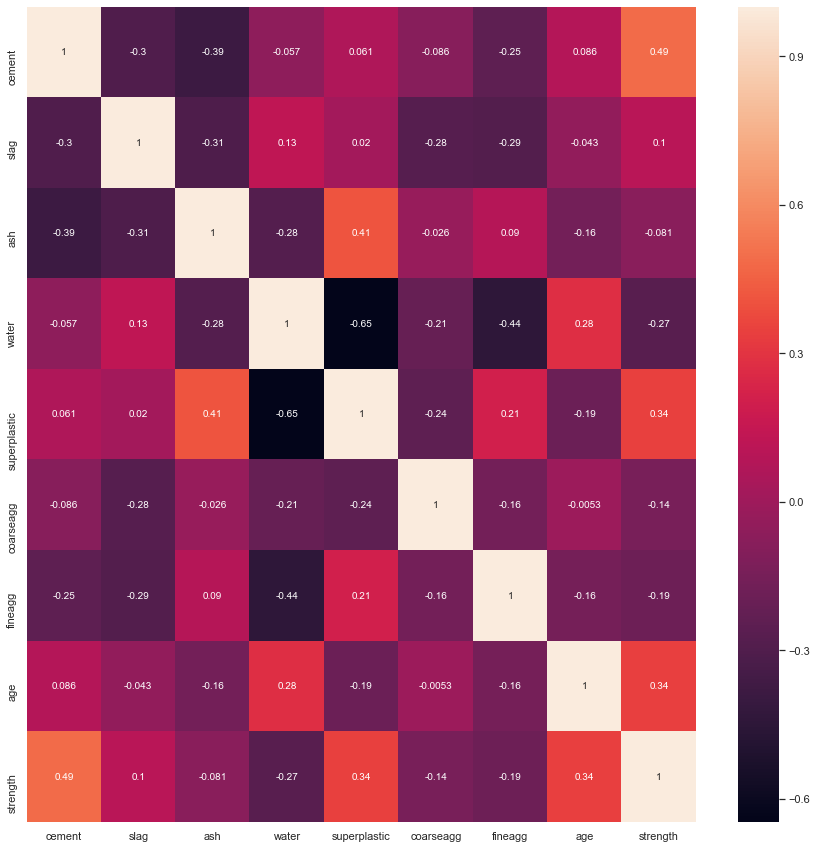

In [13]:
# build a heat map of correlation
plt.figure(figsize= (15,15))
sns.heatmap(concrete_df.corr(), annot=True)

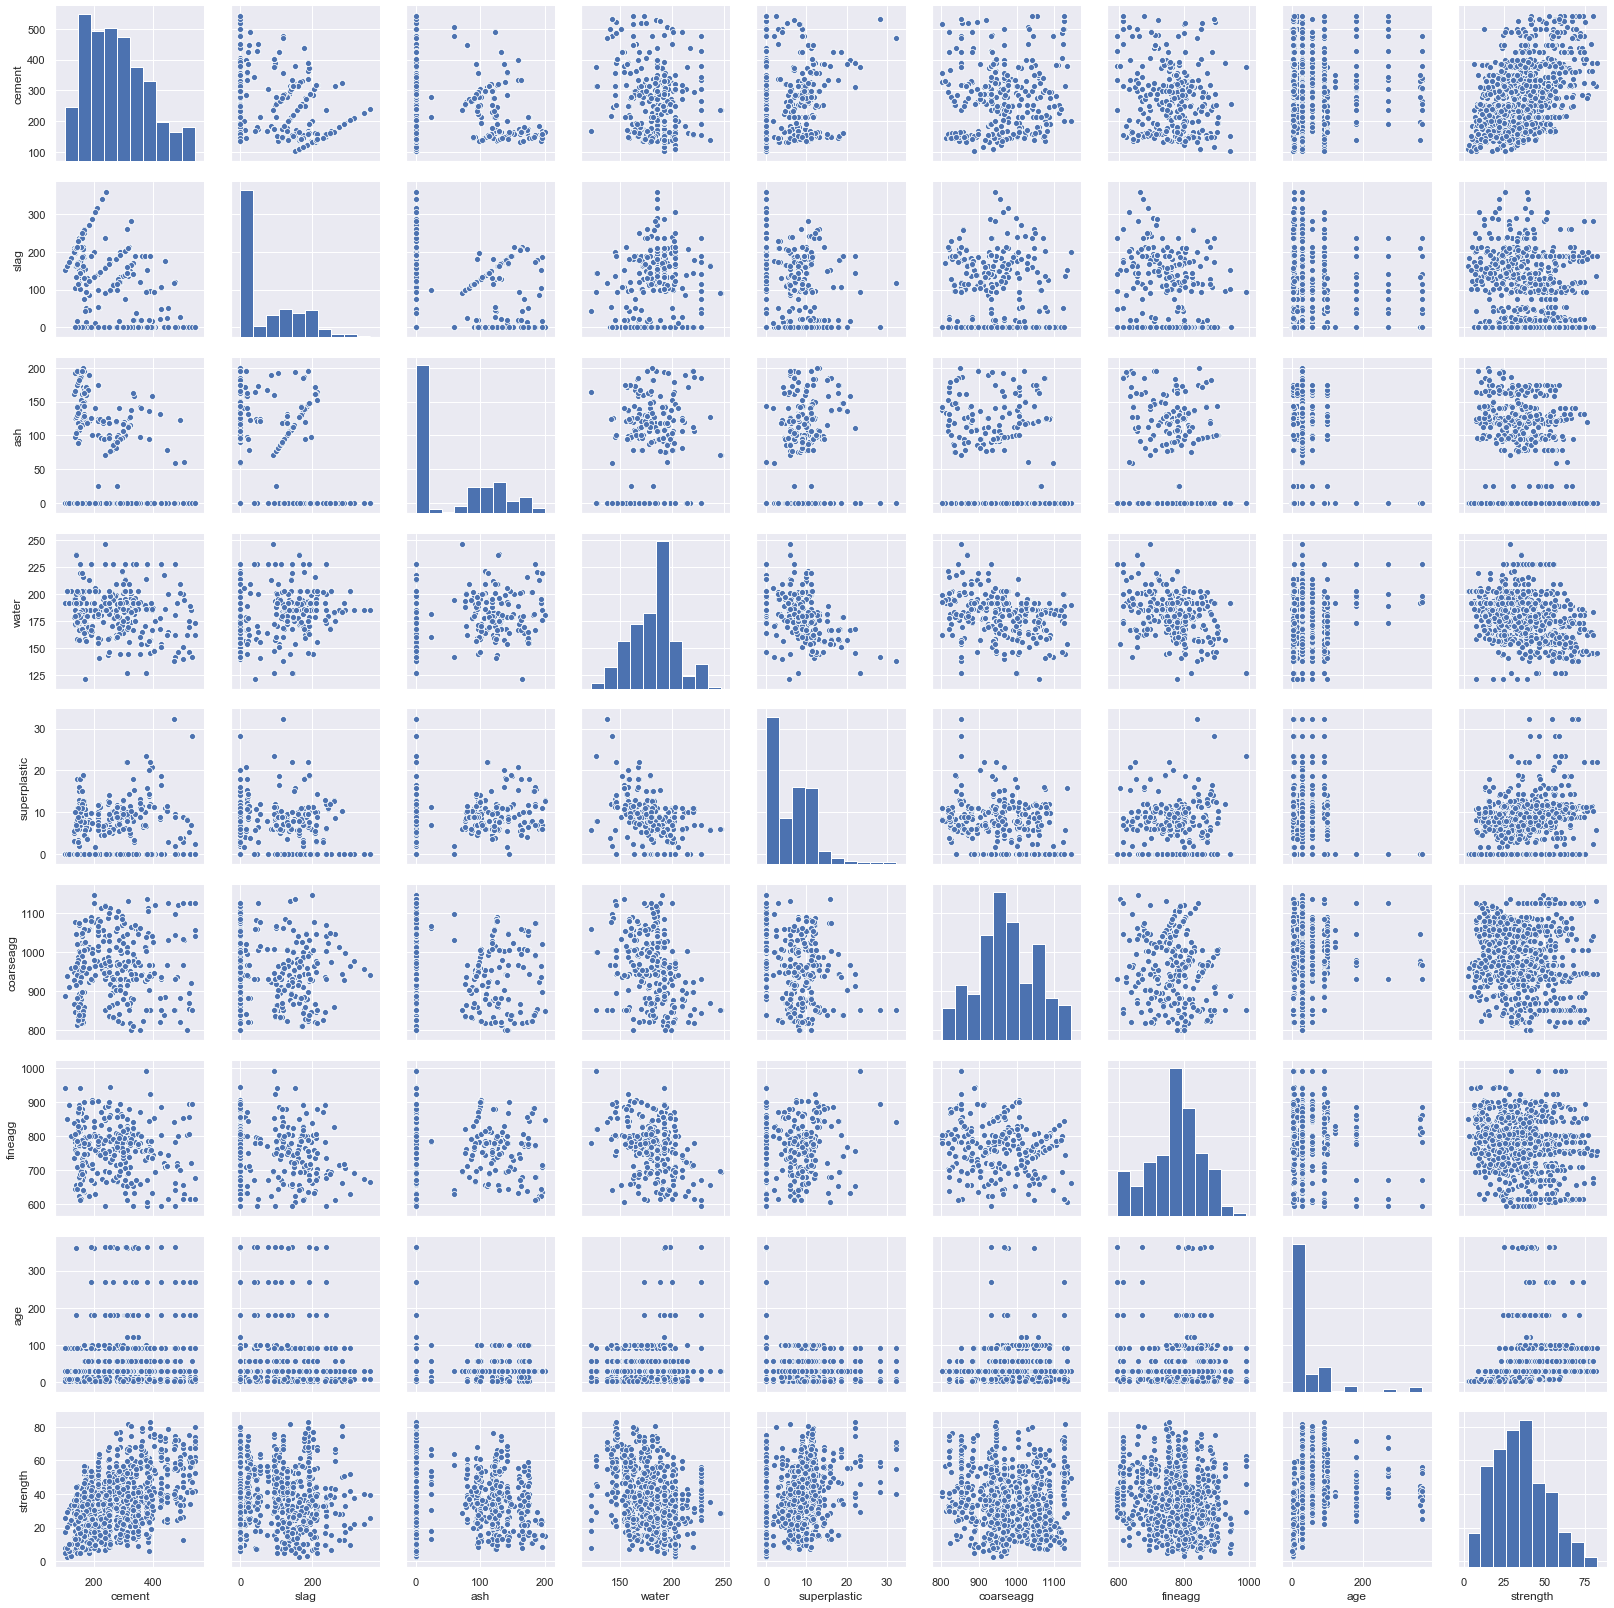

In [14]:
sns.pairplot(concrete_df)

## from above correlation heat map we can observe that:
### water and super plastic are highly inversly correlated which means more the amount of water less the density of superplastic. Also to some behaves in same way to some degree with fineagg and course agg

### as the age of concrete increases strength also increases

### looks like strength of concrete is good if we use more cement, less water and more superplastic

### cement has somewhat negative corr with ash, fineagg and slag wich means if cement is used more generally other quanties are used in less 

### superplstic has some high postive relation which may mean if one is used more, the other is also used more

#### Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)

In [15]:
concrete_df2 = concrete_df.copy() # make a copy and add extra new made columsn here. Will run both the data separately and check

### Though not domain expert with some intution and some research , I found 3 possible new colums 
#### 1. Cement to water ratio (by intution)
#### 2. CoarseAgg to FineAgg ratio (coarseagg are heavier particles and fine are smaller particles )
#### 3. Superplastic to water ratio (superplastic is used to reduce water  )

In [16]:
concrete_df2['cement_to_water_ratio'] = concrete_df2['cement'] /  concrete_df2['water']
concrete_df2['coarse_to_fine_ratio'] = concrete_df2['coarseagg'] /  concrete_df2['fineagg']
concrete_df2['superplastic_to_water_ratio'] = concrete_df2['superplastic'] /  concrete_df2['water']

#### Get the data model ready and do a train test split.

In [17]:
## doing everything seperately for original and one with added new columns

X = concrete_df.drop(['strength'], axis=1)
X2 = concrete_df2.drop(['strength'], axis=1)

y = concrete_df['strength']
y2 = concrete_df2['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

####  Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

In [18]:
## linear model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6155668588693705

In [19]:
# with polynomial model with degree 2
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_poly, y_train)
print(lr.score(X_poly, y_train))

0.8146092429248354


In [20]:
# Using Ridge with degree 3
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
lrr = Ridge()
lrr.fit(X_poly, y_train)
print(lrr.score(X_poly, y_train))

0.9278167233090737


In [21]:
# useing lasso with degree 5
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(X_train)
lrl = Lasso()
lrl.fit(X_poly, y_train)
print(lrl.score(X_poly, y_train))

0.9399740346573827


In [22]:
# useing lasso with degree 5 with extra cols
poly2 = PolynomialFeatures(degree = 5)
X_poly2 = poly2.fit_transform(X_train2)
lrl2 = Lasso()
lrl2.fit(X_poly2, y_train2)
print(lrl2.score(X_poly2, y_train2))

0.951803186060819


In [23]:
## do with with random forest
rf = RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

0.9859656387869944


In [24]:
## do with gradient boost
gb = GradientBoostingRegressor(n_estimators=200)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))

0.9695755785163453


### Clearly we can see that a linear model is underfitting the data. So we need to test with higher degree models and other types of non linear. Testing with various polynomial degrees along with lasso and ridge is improving the model significantly. Similarly other non linear models like Random forest and Gradient Boost is increasing the accuracy

### Algorithms that you think will be suitable for this project.
#### I am going to test with three models i.e Lasso with degree 5, Random Forest and Grandient Boost

### Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)

In [25]:
num_folds = 10
seed = 75
metric_cv_list = []

In [26]:
method = "Lasso5Reg"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(lrl,X_poly, y_train, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [27]:
method = "RandForest"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(rf,X_train, y_train, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [28]:
method = "GradBoost"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(gb,X_train, y_train, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [29]:
method = "Lasso5Reg_ExtraCols"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(lrl2,X_poly2, y_train2, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [30]:
method = "RandForest_ExtraCols"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(rf,X_train2, y_train2, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [31]:
method = "GradBoost_ExtraCols"
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(gb,X_train2, y_train2, cv=kfold)
metric_cv_list.append([method, results.mean(), results.std()])

In [32]:
pd.DataFrame(metric_cv_list, columns=['Method','R2Score','Standart Deviation'])

,Method,R2Score,Standart Deviation
0,Lasso5Reg,0.862694,0.044306
1,RandForest,0.903195,0.016885
2,GradBoost,0.918247,0.013258
3,Lasso5Reg_ExtraCols,0.850063,0.042048
4,RandForest_ExtraCols,0.904244,0.019354
5,GradBoost_ExtraCols,0.919584,0.013463


### from here we see GradBoost is doing best also adding extra modified cols seems to imporve accuracy a little bit, but cant be too sure here. 

### Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.

In [33]:
metric_rscv_list = []

In [34]:
## Randomised search for random forest 
parameters = {'bootstrap': [True],
 'criterion': ['mse', 'mae'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'max_features' : ['auto','sqrt'],
 'n_estimators': range(100,200)}

clf = RandomizedSearchCV(RandomForestRegressor(),parameters,n_iter= 20, cv = 10, verbose = 2, n_jobs= 4)
clf.fit(X_train, y_train)

metric_rscv_list.append(['randForestRandSearchCV',clf.score(X_train, y_train)])
clf.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 170,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'mse',
 'bootstrap': True}

In [35]:
## Randomised search for Grad Boost
gb_parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],
 'criterion' : ['friedman_mse', 'mse', 'mae'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'max_depth' : range(2,5),
 'max_features' : ['auto','sqrt'],
 'learning_rate' : np.arange(0.1,0.9,0.05),
 'n_estimators': range(100,250)}

gbrs = RandomizedSearchCV(GradientBoostingRegressor(),gb_parameters,n_iter= 20, cv = 10, verbose = 2, n_jobs= 4)
gbrs.fit(X_train, y_train)
metric_rscv_list.append(['GradBoostRandSearchCV',gbrs.score(X_train, y_train)])
gbrs.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 241,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.30000000000000004,
 'criterion': 'mse'}

In [36]:
## Randomised search for random forest with extra params
parameters = {'bootstrap': [True],
 'criterion': ['mse', 'mae'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'max_features' : ['auto','sqrt'],
 'n_estimators': range(100,200)}

clf2 = RandomizedSearchCV(RandomForestRegressor(),parameters,n_iter= 20, cv = 10, verbose = 2, n_jobs= 4)
clf2.fit(X_train2, y_train2)

metric_rscv_list.append(['randForestRandSearchCV_ExtraCols',clf2.score(X_train2, y_train2)])
clf2.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 103,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'mae',
 'bootstrap': True}

In [37]:
## Randomised search for Grad Boost with extra params
gb_parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],
 'criterion' : ['friedman_mse', 'mse', 'mae'],
 'min_samples_leaf': range(1,5),
 'min_samples_split': range(2,5),
 'max_depth' : range(2,5),
 'max_features' : ['auto','sqrt'],
 'learning_rate' : np.arange(0.1,0.9,0.05),
 'n_estimators': range(100,250)}

gbrs2 = RandomizedSearchCV(GradientBoostingRegressor(),gb_parameters,n_iter= 20, cv = 10, verbose = 2, n_jobs= 4)
gbrs2.fit(X_train2, y_train2)
metric_rscv_list.append(['GradBoostRandSearchCV_ExtraCols',gbrs2.score(X_train2, y_train2)])
gbrs.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'n_estimators': 241,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 2,
 'loss': 'huber',
 'learning_rate': 0.30000000000000004,
 'criterion': 'mse'}

In [38]:
pd.DataFrame(metric_rscv_list, columns=['method', 'R2 Score'])

,method,R2 Score
0,randForestRandSearchCV,0.985791
1,GradBoostRandSearchCV,0.969739
2,randForestRandSearchCV_ExtraCols,0.986108
3,GradBoostRandSearchCV_ExtraCols,0.995262


### The random search CV significantly improved the performance for all the cases

###  Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)

### R2 square explains the proportion of variance for a dependent variable (target) that can be explained by an independent variable. So from a businnes perspective its important to know how well the independent variable explains the dependent variable. 

### Lets assume that a business is interested in some measure/ KPI or a target metric. That could be final sales, profit or something like the performance of a machine. Now the business wants to know what the factors affecting it, bascially its looking for indenpendent variable. Now a data analyst collect some independent variable which he thinks affects the target variable. So from R2 score he will come to know whether the collected independent variables are explaining that. 

### So if r2 score is 0.5 this means than half of the output variance is explained by the inputs


### Now the effect of increase and Decrease in R2 on businnes model is a tricky question. In general it seems that high R2 means a good model but that can be false. Reason 1 : The sample data we have chosed from the population may not explain the population well. So we might get a very high R2 but it the model is not a reasonable representation of population. Reason 2 : IF we build a very complex model the model will fit the noise also. Will get a very high score of R2 but this is not good, it is leading to overfitting. 3. By mistake if one of the independent varible is just some kind of transformation of dependent varible will get a very high score of R2 but this model is of liitle use. Reason 4. Adding more varible as input will lead to increase in R2


### A low R2 can be good in some cases. IF we have a problem where a target depends on lot of things which is difficult to explain. in that cases an R2 of even 0.5 can be considered good. 


### For this specific problem of concrete assuming from domain , these input varibale explains most of the varince in output, having a high R2 is desirable still with some caution. But if we assume there are other factors which explains the strength but missing we can live with a moderaye 


### Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)

### Recomm : Use more cement for more strength if possible not assuming cost and other factors like cement may reduce durability etc. This is based on fact that we see on an avegage higher end strenght concrete has more amount of cement. ex aveage cement is 398.819 kg/m-cube for cases where strength is grater than 70, 319.9421 for cases btw (40,60), 261.33 btw (20,40) and 216 for less than 20


### Recomm : Business can use these regression model which is giving 92% score for knowing in advance what would be the strength of concrete with more precison than their educated guess. There can be may scenarios where it may help. <br>Scenario 1 : Suppose they have already made a mixture and and they measure the strength using this model and they find out its not meeting the requirement they can discard it, it may save them some logistic cost.<br> Scenario 2 : They can use these models well in advance to predict the the strength before making the mixture.

###  Recomm : Assuming a lot of cost is incurred in having measuremnt of strength using sophisticated measuring equipment , using these model can save cost

### Recomm : Govt agencies can use these models to predict the strength of concrete while inspection


### Recomm IMP**** : As age is the parameter in this model, this model can be used to forecst the lifespan of the concrete until when it is going to durable and when the strength will go down and may lead to HAZARD


### Recomm : Use more superplastic for more strength if possible not assuming cost and other factors like it  may reduce durability etc. This is based on fact that we see on an avegage higher end strenght concrete has more amount of superplastic. ex aveage cement is 10.863 kg/m-cube for cases where strength is grater than 70, 7.499 for cases btw (40,60), 5.401 btw (20,40) and 3.717 for less than 20

###  The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

In [39]:
# CALCULATE THE SCORES ON THE TEST DATA

In [40]:
# using the best params from RandForest Random Search CV
clf.score(X_test, y_test)

0.9153878729663627

In [41]:
# using the best params from GradBoost Random Search CV
gbrs.score(X_test, y_test)

0.9190595387207439

In [42]:
# using the best params from RandForest Random Search CV with added columns
clf2.score(X_test2, y_test2)

0.9167893483332583

In [43]:
# using the best params from GradBoost Random Search CV with added columns
gbrs2.score(X_test2, y_test2)

0.9201858186218629

## Getting around 92 % R2 score on test data, with Gradient Boost as the best estimator

## EXTRA
##### CHECH MAE SCORES AS WELL

In [44]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(y_test, gbrs2.predict(X_test2))

3.1218736375488376

In [47]:
mean_absolute_error(y_test, clf2.predict(X_test2))

3.31922958025407

In [48]:
mean_absolute_error(y_test, gbrs.predict(X_test))

3.1815626254774787

In [49]:
mean_absolute_error(y_test, clf.predict(X_test))

3.245181274300764